Import the Libraries

In [2]:
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import log_loss
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

Load dataset

In [3]:
data = load_digits();


Data pre-processing

In [4]:
X = data.images.reshape((len(data.images), -1))


X = X / 16.0 

y = data.target

Split the dataset into 80%-20% ratio

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Standardize features by removing the mean and scaling to unit variance

In [7]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Train with different kernals

In [8]:
svm_model_linear = SVC(kernel='linear').fit(X_train_scaled, y_train)
svm_model_radial = SVC(kernel='rbf', gamma='scale').fit(X_train_scaled, y_train)
svm_model_poly = SVC(kernel='poly', degree=3, coef0=1).fit(X_train_scaled, y_train)

Make prediction with each kernal

In [10]:
y_pred_linear = svm_model_linear.predict(X_test_scaled)
y_pred_radial = svm_model_radial.predict(X_test_scaled)

y_pred_poly = svm_model_poly.predict(X_test_scaled)

Accuracy for each model

In [11]:
print("Accuracy - Linear Kernel:", accuracy_score(y_test, y_pred_linear))
print("Accuracy - Radial Kernel:", accuracy_score(y_test, y_pred_radial))
print("Accuracy - Polynomial Kernel:", accuracy_score(y_test, y_pred_poly))

Accuracy - Linear Kernel: 0.975
Accuracy - Radial Kernel: 0.9805555555555555
Accuracy - Polynomial Kernel: 0.9861111111111112


plot the confusion matrix for each model

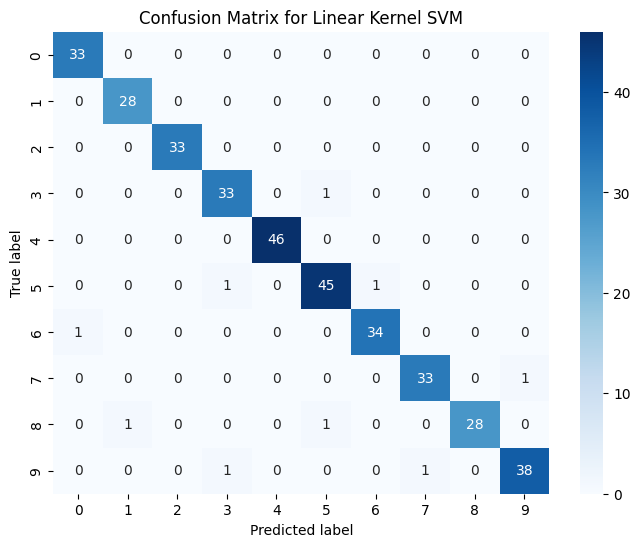

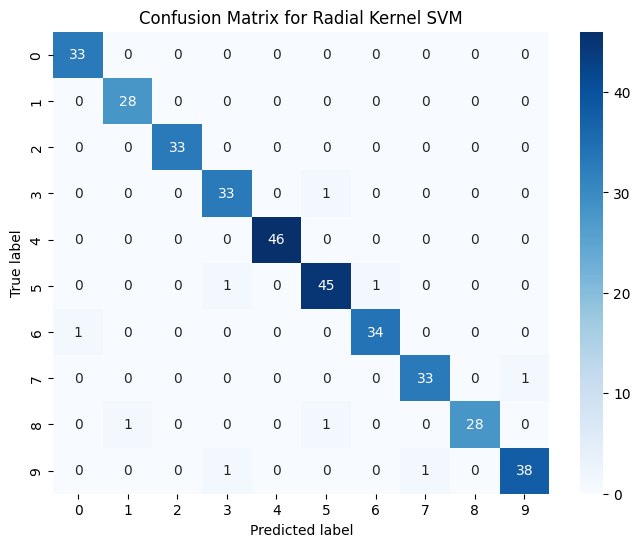

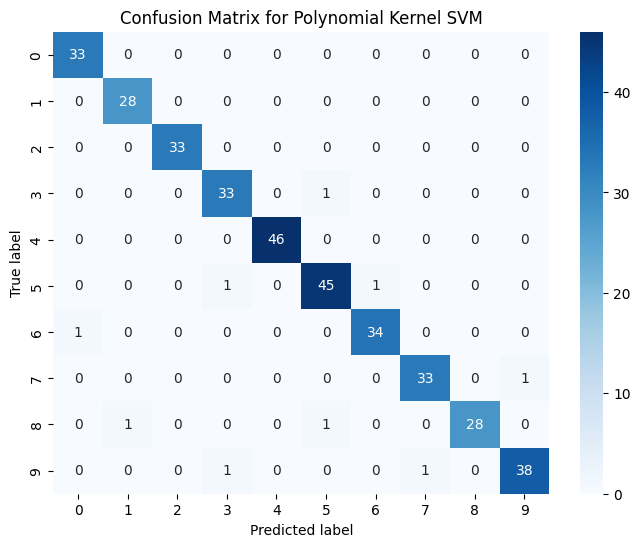

In [15]:
def plot_confusion_matrix(cm, title):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix for {title} Kernel SVM')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
linear_cm= confusion_matrix(y_test,y_pred_linear)
plot_confusion_matrix(linear_cm, 'Linear')

radial_cm= confusion_matrix(y_test,y_pred_radial)
plot_confusion_matrix(linear_cm, 'Radial')

polynomial_cm= confusion_matrix(y_test,y_pred_poly)
plot_confusion_matrix(linear_cm, 'Polynomial')

hyper parameter tuning

In [17]:
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10],
}
grid_search = GridSearchCV(svm_model_radial, param_grid, cv=5, scoring='accuracy', n_jobs=3)
grid_search.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(), n_jobs=3,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
                         'gamma': ['scale', 'auto', 0.01, 0.1, 1, 10]},
             scoring='accuracy')

Print the best parameters and model

In [18]:
best_params = grid_search.best_params_
print("Best Parameters:", best_params)


Best Parameters: {'C': 100, 'gamma': 0.01}


heat map and grid search

In [12]:
scores_matrix = grid_search.cv_results_['mean_test_score'].reshape(len(param_grid['C']),
                                                                    len(param_grid['degree']),
                                                                    len(param_grid['gamma']),
                                                                    len(param_grid['coef0']))

plotting the heatmap

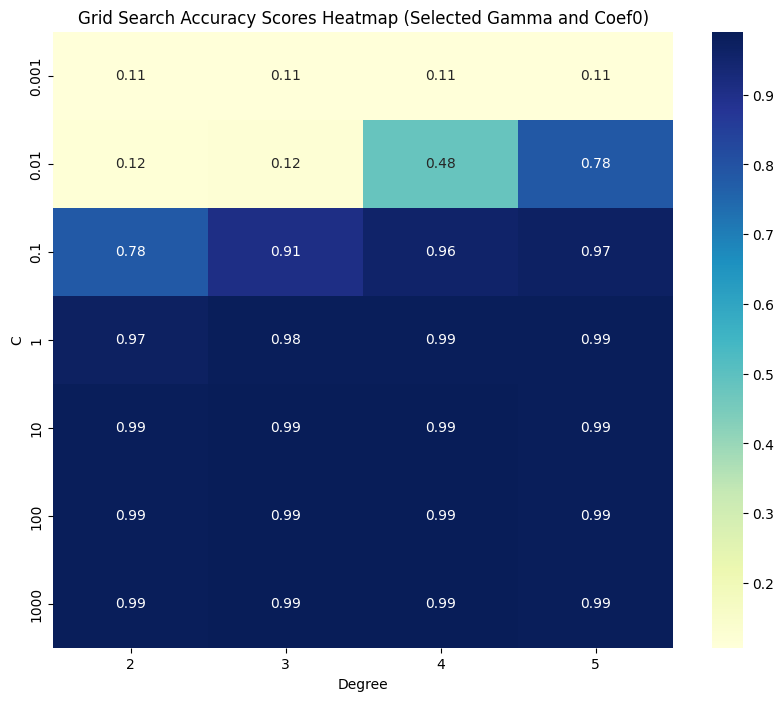

In [13]:
# Here, we are selecting a specific 'gamma' and 'coef0' to visualize as an example
selected_gamma_index = 0  # Index corresponding to 'scale' in the 'gamma' list
selected_coef0_index = 0  # Index corresponding to 0.0 in the 'coef0' list

# Plotting the heatmap for the selected slice of hyperparameters
plt.figure(figsize=(10, 8))
sns.heatmap(scores_matrix[:, :, selected_gamma_index, selected_coef0_index], annot=True, cmap='YlGnBu',
            xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Grid Search Accuracy Scores Heatmap (Selected Gamma and Coef0)')
plt.xlabel('Degree')
plt.ylabel('C')
plt.show()

Training accuracy

In [14]:
train_accuracy_linear = accuracy_score(y_train, svm_model_linear.predict(X_train_scaled))
train_accuracy_radial = accuracy_score(y_train, svm_model_radial.predict(X_train_scaled))
train_accuracy_sigmoid = accuracy_score(y_train, svm_model_sigmoid.predict(X_train_scaled))
train_accuracy_poly = accuracy_score(y_train, svm_model_poly.predict(X_train_scaled))

Plotting training vs test accuracy

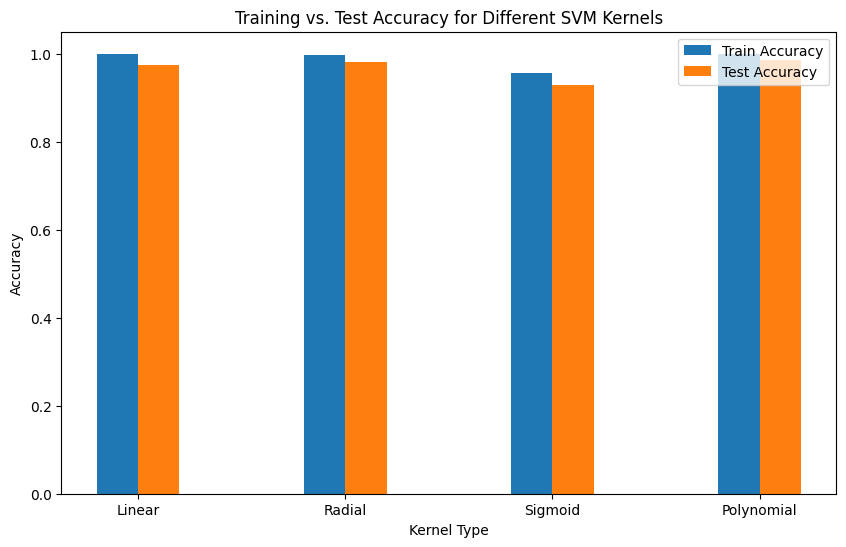

In [15]:
plt.figure(figsize=(10, 6))
bar_width = 0.2
index = np.arange(4)

bar1 = plt.bar(index, [train_accuracy_linear, train_accuracy_radial, train_accuracy_sigmoid, train_accuracy_poly], bar_width, label='Train Accuracy')
bar2 = plt.bar(index + bar_width, [accuracy_score(y_test, y_pred_linear), accuracy_score(y_test, y_pred_radial), accuracy_score(y_test, y_pred_sigmoid), accuracy_score(y_test, y_pred_poly)], bar_width, label='Test Accuracy')

plt.xlabel('Kernel Type')
plt.ylabel('Accuracy')
plt.title('Training vs. Test Accuracy for Different SVM Kernels')
plt.xticks(index + bar_width / 2, ['Linear', 'Radial', 'Sigmoid', 'Polynomial'])
plt.legend()
plt.show()

Plotting Classification Metric vs. Model Complexity
Extracting mean test scores for a specific 'gamma' and 'coef0'

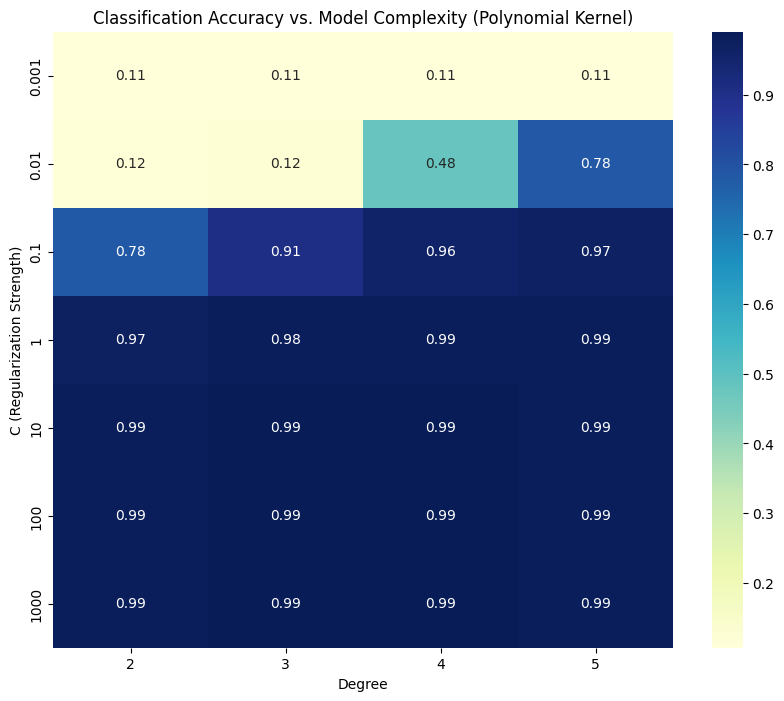

In [16]:
mean_test_scores = scores_matrix[:, :, selected_gamma_index, selected_coef0_index]

# Plotting heatmap for each 'C' and 'degree' combination
plt.figure(figsize=(10, 8))
sns.heatmap(mean_test_scores, annot=True, cmap='YlGnBu', xticklabels=param_grid['degree'], yticklabels=param_grid['C'])
plt.title('Classification Accuracy vs. Model Complexity (Polynomial Kernel)')
plt.xlabel('Degree')
plt.ylabel('C (Regularization Strength)')
plt.show()